In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
path1 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [4]:
f1['Nobelyear'] = f1['Nobel'].map(f2.set_index('paperid')['paperyear'])
f1['gap'] = f1['paperyear'] - f1['Nobelyear']
f1['type'] = f1['type'].map({'CC':'CCP','DC':'DCP'})

In [5]:
path4 = r'E:\netData\MAG\MAG\hitlst.zip'
f4 = pd.read_csv(path4)
f1['hit'] = f1['paperid'].map(dict(zip(f4['0'] , ['hit']*len(f4))))
f1['hit'] = f1['hit'].fillna(0)
f1['hit'] = f1['hit'].map({0:0,'hit':1})

In [6]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

# Dynamic citation

In [9]:
f1O = f1[f1['cit']>0]
f11O = f1O[f1O['Field'] == 'Physics']
f12O = f1O[f1O['Field'] == 'Chemistry']
f13O = f1O[f1O['Field'] == 'Medicine']
flstO = [f11O,f12O,f13O]

In [10]:
flst = [f11,f12,f13]
glst = [18.2,16,16.7]

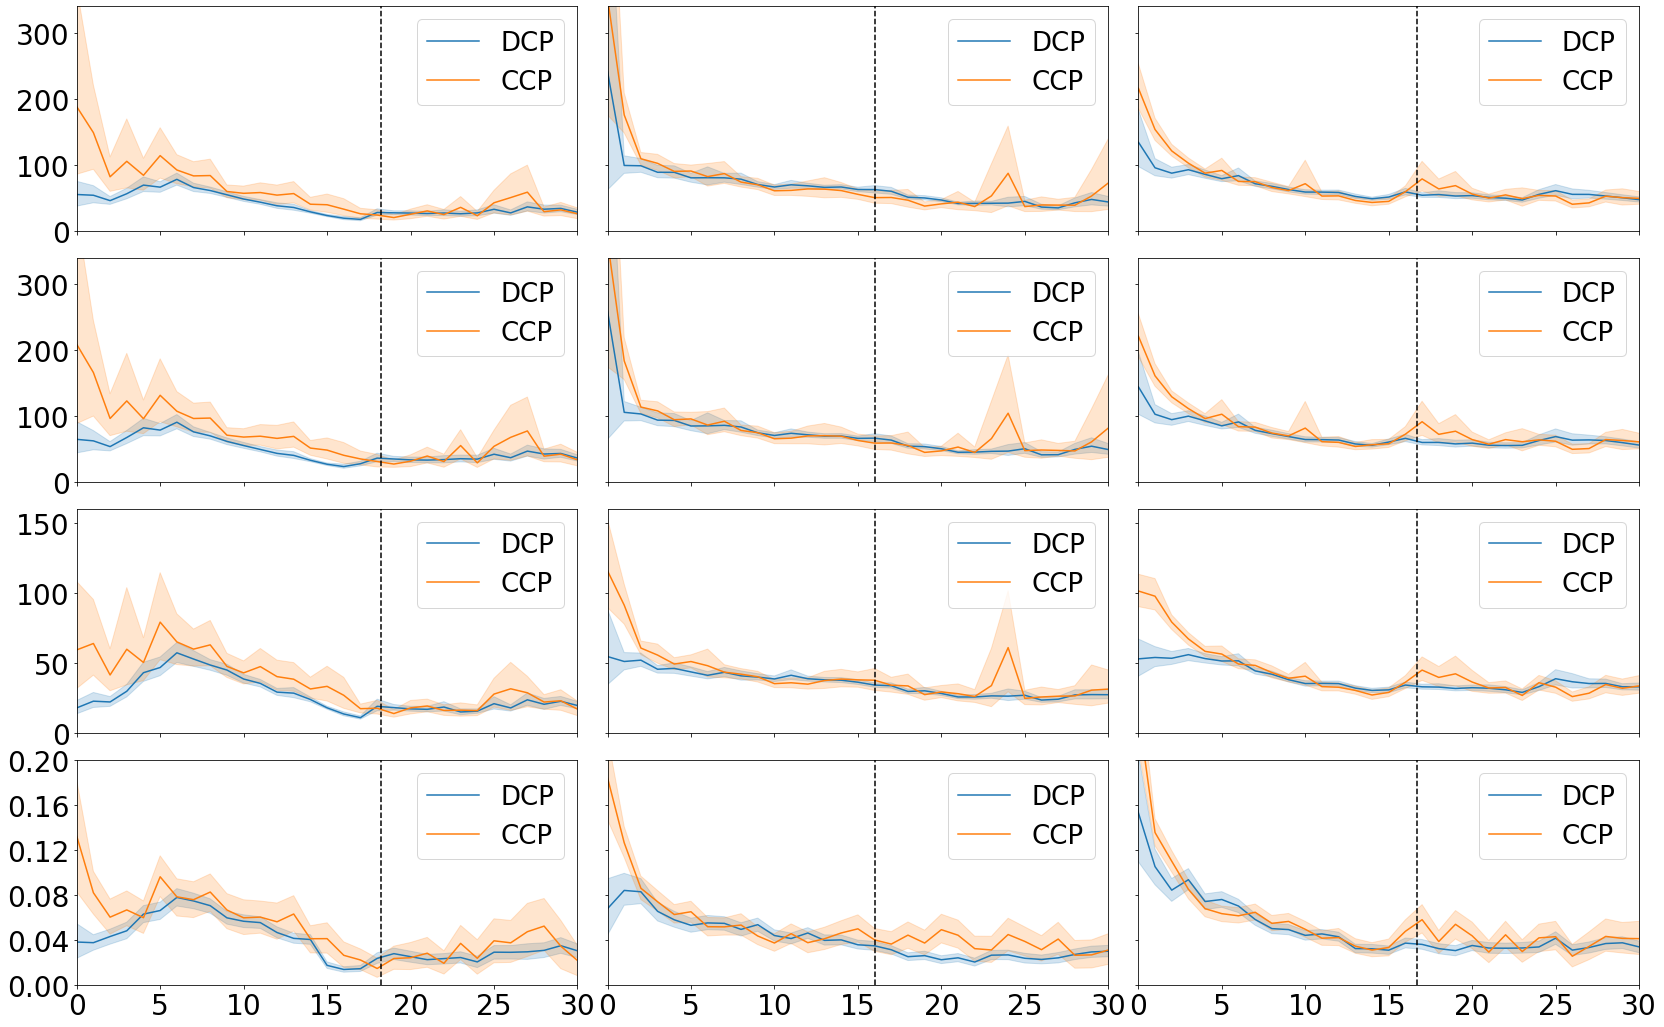

In [11]:
plt.subplots(4,3,figsize=(28,18),sharex=True,sharey='row')
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.06,hspace=0.12)
for _ in range(3):
    ax = plt.subplot(4,3,_ + 1)
    sns.lineplot(data=flst[_], x="gap", y="cit", hue="type",hue_order=['DCP','CCP'])
    plt.xlim(0,30)
    plt.ylim(0,340)
    plt.xticks(size = 28)
    plt.yticks([0,100,200,300],size = 28)
    plt.legend(fontsize = 26)
    ax.vlines(glst[_],0,340, linestyles='dashed',colors = '#000000')
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
    
    ax = plt.subplot(4,3,_ + 4)
    sns.lineplot(data=flstO[_], x="gap", y="cit", hue="type",hue_order=['DCP','CCP'])
    plt.xlim(0,30)
    plt.ylim(0,340)
    plt.xticks(size = 28)
    plt.yticks([0,100,200,300],size = 28)
    plt.legend(fontsize = 26)
    ax.vlines(glst[_],0,340, linestyles='dashed',colors = '#000000')
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
    
    ax = plt.subplot(4,3,_ + 7)
    sns.lineplot(data=flst[_], x="gap", y="cit10", hue="type",hue_order=['DCP','CCP'])
    plt.xlim(0,30)
    plt.ylim(0,160)
    plt.xticks(size = 28)
    plt.yticks([0,50,100,150],size = 28)
    ax.vlines(glst[_],0,160, linestyles='dashed',colors = '#000000')
    plt.legend(fontsize = 26)
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
    
    ax = plt.subplot(4,3,_ + 10)
    sns.lineplot(data=flst[_], x="gap", y="hit", hue="type",hue_order=['DCP','CCP'])
    plt.xlim(0,30)
    plt.ylim(0,0.1)
    plt.xticks(size = 28)
    plt.yticks([0,0.04,0.08,0.12,0.16,0.20],size = 28)
    ax.vlines(glst[_],0,160, linestyles='dashed',colors = '#000000')
    plt.legend(fontsize = 26)
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 5\1.pdf',bbox_inches = 'tight')

In [15]:
f11C = f11[f11['type']=='CCP']
f11D = f11[f11['type']=='DCP']

In [16]:
f11C1 = f11C[f11C['gap']<18]
f11C2 = f11C[f11C['gap']>=18]
f11D1 = f11D[f11D['gap']<18]
f11D2 = f11D[f11D['gap']>=18]

In [17]:
scipy.stats.mannwhitneyu(f11C1['cit'] , f11D1['cit'], alternative='two-sided')

MannwhitneyuResult(statistic=851115656.5, pvalue=2.825554233038453e-31)

In [18]:
scipy.stats.mannwhitneyu(f11C2['cit'] , f11D2['cit'], alternative='two-sided')

MannwhitneyuResult(statistic=1435796990.5, pvalue=0.0001300680537070853)